## Tasksdescription:

- Create a new model with the formula 𝑤2 ⋅ 𝑡𝑢^2 + 𝑤1 ⋅ 𝑡𝑢 + 𝑏
- Adjust the training loop accordingly and perform the perform the training again
- Did the "loss" get bigger or smaller with the new model?
- Does the result look better or worse with the new model?
- Plot the progression of the loss over 5000 epochs of training with the new and old model in a graph.

## Implementation:

In [28]:
# import necessary packages
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim

In [29]:
# import the data from the given file and store them under the variables t_u and t_c
values = np.loadtxt('vl5_data.csv')
t_u = torch.tensor(values[:,1])
t_c = torch.tensor(values[:,0])

In [30]:
# norminate the t_u and create tensors with starting values for w (slope) and b (y-intercept)
t_un = 0.1 * t_u
new_params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True) # [w1, w2, b]
old_params = torch.tensor([1.0, 0.0], requires_grad=True) # [w, b]

In [31]:
# define the new model and give the old model for reference
def new_model(t_u, params):
    [w1, w2, b] = params
    t_p = w2 * pow(t_u, 2) + w1 * t_u + b
    return t_p

def old_model(t_u, params):
    [w, b] = params
    t_p = w*t_u + b
    return t_p

In [32]:
# define the loss function
def loss_fn(t_p, t_c):
    sq_diff = (t_p - t_c)**2
    return sq_diff.mean()

# define the training_loop
# distinguish between the old_params and new_params by looking at the size of the tensor
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        if params.size(dim=0) == 3:
            train_t_p = new_model(train_t_u, params)
        else:
            train_t_p = old_model(train_t_u, params)
        train_loss = loss_fn(train_t_p, train_t_c)
        with torch.no_grad():
            if params.size(dim=0) == 3:
                val_t_p = new_model(val_t_u, params)
            else:
                val_t_p = old_model(val_t_u, params)
            val_loss = loss_fn(val_t_p, val_t_c)
            assert val_loss.requires_grad == False #Checks that our output requires_grad args are forced to False inside this block
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        if epoch <= 3 or epoch % 500 == 0:
            # print the training and validation loss for the first 3 epochs and after that only for epoche 500, 1000, 1500, 2000, ...
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"f" Validation loss {val_loss.item():.4f}")

In [33]:
# divide the data set into training and test data
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)
print(f'gesamtanzahl = {n_samples}, validierungsanzahl = {n_val}')

shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
print(train_indices)
print(val_indices)

train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

# normalization
train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

gesamtanzahl = 11, validierungsanzahl = 2
tensor([5, 6, 4, 7, 2, 9, 8, 1, 3])
tensor([10,  0])


In [34]:
# enter the parameters for adjusting the training loop
learning_rate = 1e-1
n_epochs = 5000

Epoch 1, Training loss 74.8975, Validation loss 104.9653
Epoch 2, Training loss 66.6729, Validation loss 95.6786
Epoch 3, Training loss 59.2884, Validation loss 87.2458
Epoch 500, Training loss 3.0017, Validation loss 3.8733
Epoch 1000, Training loss 2.9793, Validation loss 3.3240
Epoch 1500, Training loss 2.9793, Validation loss 3.3238
Epoch 2000, Training loss 2.9793, Validation loss 3.3238
Epoch 2500, Training loss 2.9793, Validation loss 3.3238
Epoch 3000, Training loss 2.9793, Validation loss 3.3238
Epoch 3500, Training loss 2.9793, Validation loss 3.3238
Epoch 4000, Training loss 2.9793, Validation loss 3.3238
Epoch 4500, Training loss 2.9793, Validation loss 3.3238
Epoch 5000, Training loss 2.9793, Validation loss 3.3238


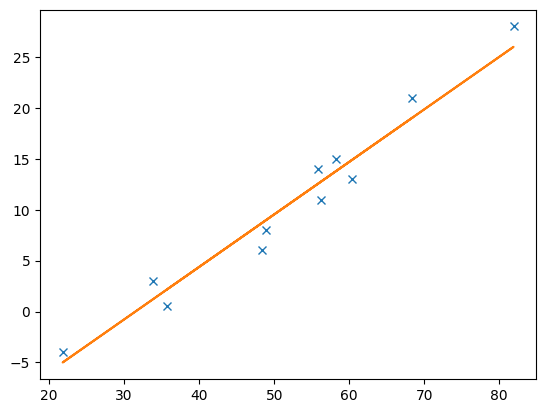

In [35]:
# OLD Model
params = old_params
optimizer = optim.Adam([params], lr=learning_rate)
training_loop(n_epochs, optimizer, params, train_t_un, val_t_un, train_t_c, val_t_c)
t_p = old_model(t_un, params)
plt.plot(t_u, t_c, 'x')
plt.plot(t_u, t_p.detach().numpy())

Epoch 1, Training loss 679.9105, Validation loss 657.2704
Epoch 2, Training loss 488.8383, Validation loss 468.0866
Epoch 3, Training loss 330.7200, Validation loss 312.8300
Epoch 500, Training loss 2.7188, Validation loss 3.6236
Epoch 1000, Training loss 2.3787, Validation loss 3.4174
Epoch 1500, Training loss 2.1544, Validation loss 3.2213
Epoch 2000, Training loss 2.0582, Validation loss 3.0761
Epoch 2500, Training loss 2.0317, Validation loss 2.9912
Epoch 3000, Training loss 2.0274, Validation loss 2.9532
Epoch 3500, Training loss 2.0271, Validation loss 2.9410
Epoch 4000, Training loss 2.0270, Validation loss 2.9384
Epoch 4500, Training loss 2.0270, Validation loss 2.9381
Epoch 5000, Training loss 2.0270, Validation loss 2.9380


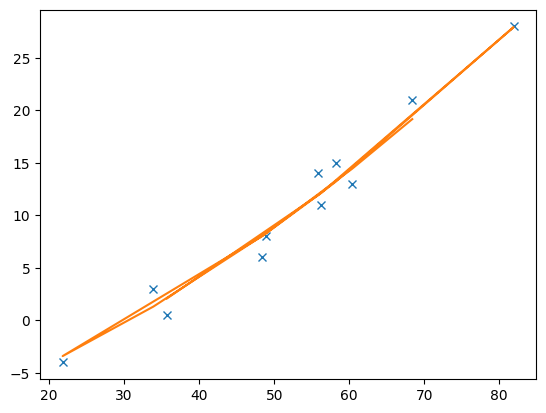

In [36]:
# NEW model
params = new_params
optimizer = optim.Adam([params], lr=learning_rate)
training_loop(n_epochs, optimizer, params, train_t_un, val_t_un, train_t_c, val_t_c)
t_p = new_model(t_un, params)
plt.plot(t_u, t_c, 'x')
plt.plot(t_u, t_p.detach().numpy())